<a href="https://colab.research.google.com/github/TalOzeri/Final-project-ML/blob/main/GK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
player_data = pd.read_csv("/content/drive/MyDrive/google colab/פרויקט גמר/players_22.csv")

In [ ]:
player_data = player_data[player_data.club_position == 'GK']


In [ ]:
columns = ['overall', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
player_df = player_data[columns]

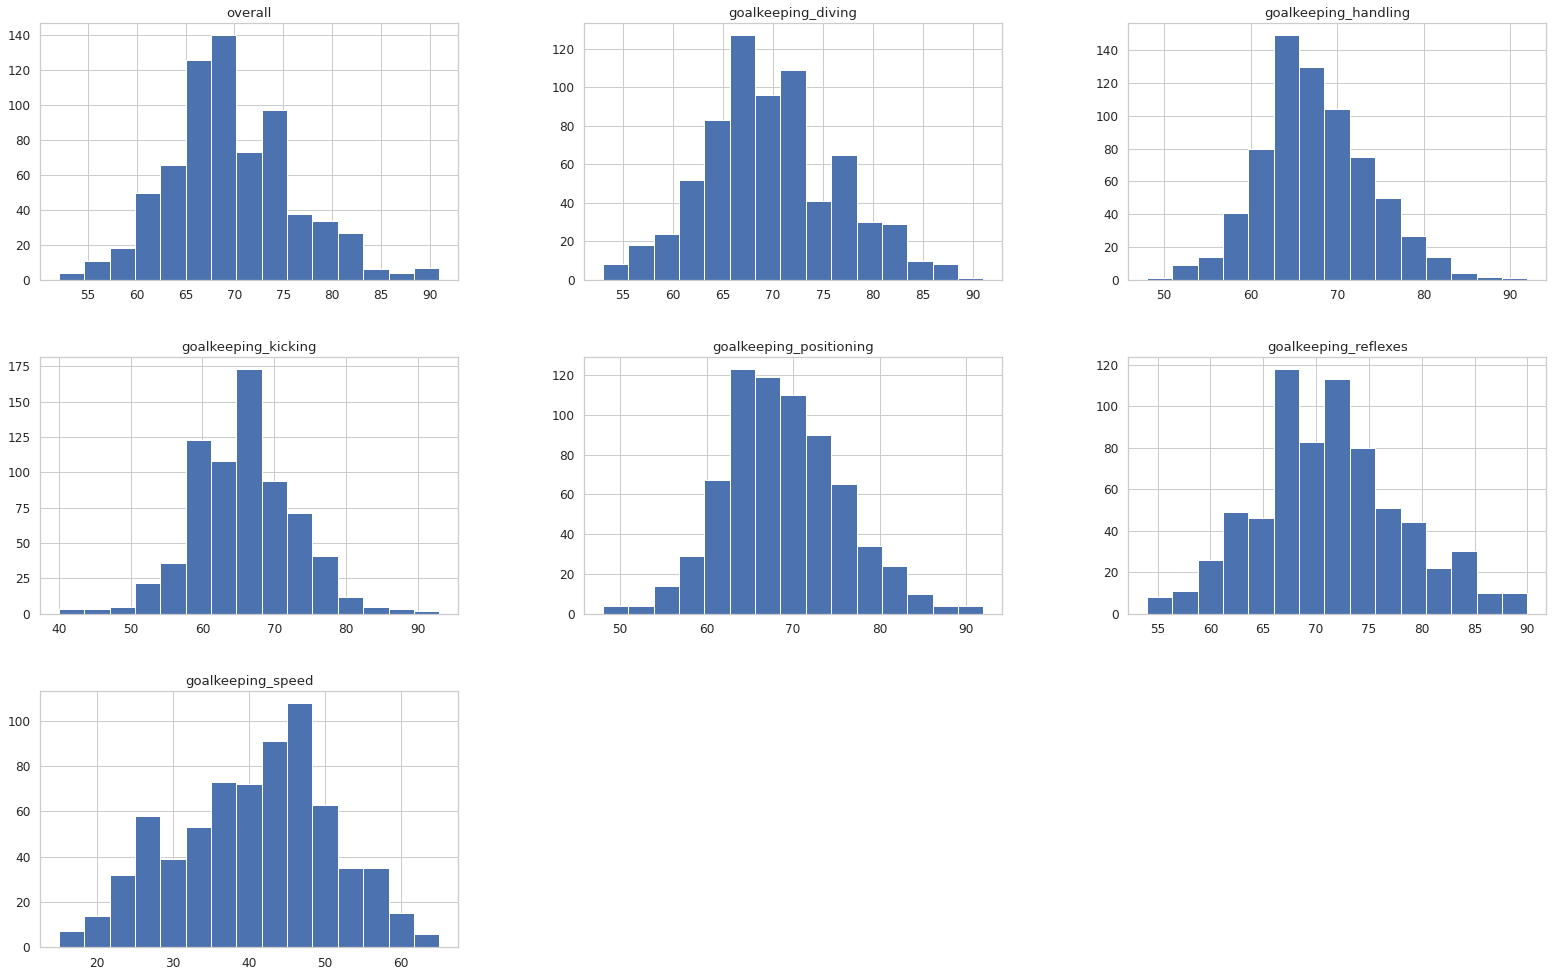

In [ ]:
player_df.hist(bins=15, figsize=(27,17))
plt.show()

In [ ]:
corr_matrix = player_df.corr()
corr_matrix['overall'].sort_values(ascending=False)

overall                    1.000000
goalkeeping_reflexes       0.951900
goalkeeping_diving         0.949789
goalkeeping_positioning    0.945048
goalkeeping_handling       0.937325
goalkeeping_kicking        0.728995
goalkeeping_speed          0.369760
Name: overall, dtype: float64

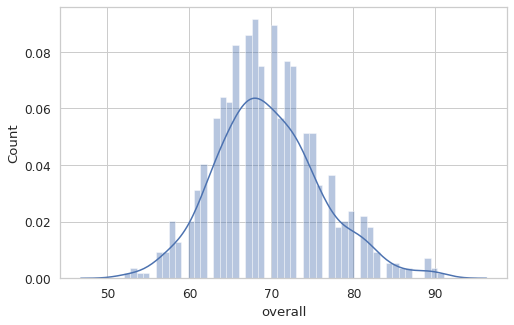

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(player_df['overall'], kde=True, bins=50).set(xlabel='overall', ylabel='Count');

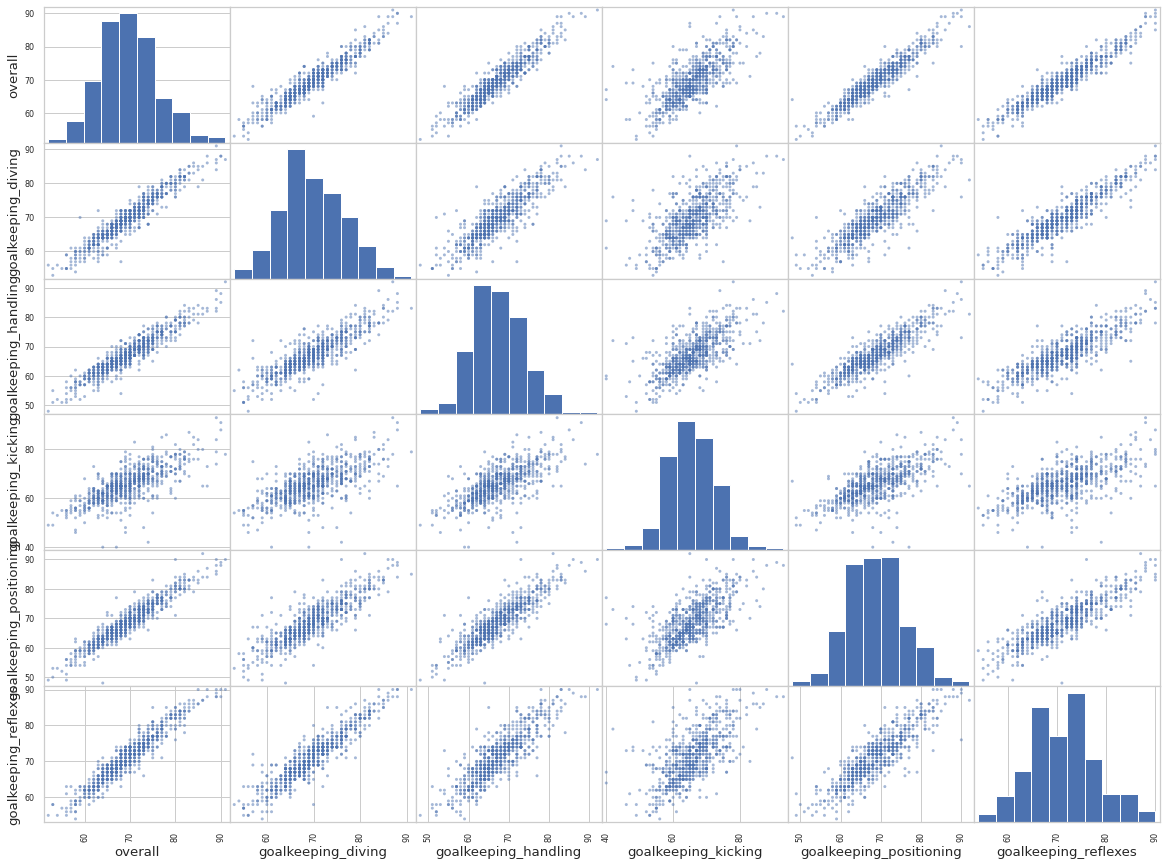

In [ ]:
from pandas.plotting import scatter_matrix
attributes =['overall', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
scatter_matrix(player_df[attributes], figsize=(20,15))
plt.show()

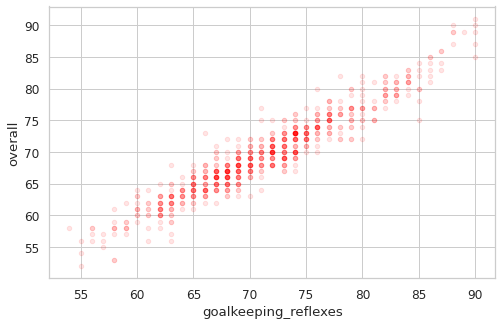

In [ ]:
player_df.plot(kind='scatter', x='goalkeeping_reflexes', y='overall', alpha=0.1, color='red')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(player_df, test_size=0.2, random_state=42)

In [ ]:
y_train = train_set['overall'].to_numpy()
X_train = train_set.drop('overall', axis=1).to_numpy()
y_test = test_set['overall'].to_numpy()
X_test = test_set.drop('overall', axis=1).to_numpy()

In [ ]:
def display_scores(scores):
  print("Scores:", scores,"\n")
  print("Mean:", scores.mean(),"\n")
  print("Standard Deviation:", scores.std())

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score


def ModelView(reg,X_test,y_test,y_train,X_train):
    #score:
    print(f'reg score: {reg.score(X_test,y_test)}')

    print("------------------------------------------")
    print("------------------------------------------\n")

    #mean_squared_error:
    y_predictions = reg.predict(X_train)
    mse = mean_squared_error(y_train, y_predictions)
    rmse = np.sqrt(mse)
    print(f'The mean squared error: {rmse}')
    print("------------------------------------------")
    print("------------------------------------------\n")

    #cross validation mse:
    scores = cross_val_score(reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10)
    reg_scores = np.sqrt(-scores)
    display_scores(reg_scores)

    print("------------------------------------------")
    print("------------------------------------------\n")

    #Explained variance:

    print(f'Explained variance: {explained_variance_score(y_train, y_predictions)}')

    print("------------------------------------------")
    print("------------------------------------------\n")

    #cross validation Explained variance:

    scores = cross_val_score(reg, X_train, y_train,
    scoring='explained_variance', cv=10)
    display_scores(scores)    

#LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
ModelView(lin_reg,X_test,y_test,y_train,X_train)

reg score: 0.9921167500227397
------------------------------------------
------------------------------------------

The mean squared error: 0.6600231374794174
------------------------------------------
------------------------------------------

Scores: [0.67080083 0.66402248 0.63443669 0.62541573 0.73823094 0.61703128
 0.79285943 0.6880743  0.58438731 0.65366174] 

Mean: 0.6668920719728433 

Standard Deviation: 0.05802674004873722
------------------------------------------
------------------------------------------

Explained variance: 0.9894404481086727
------------------------------------------
------------------------------------------

Scores: [0.98904752 0.99107801 0.99100098 0.98960273 0.99102678 0.98878786
 0.97439453 0.98630877 0.99291849 0.9887353 ] 

Mean: 0.988290095980774 

Standard Deviation: 0.004937488044815954


#KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
ModelView(knn_reg,X_test,y_test,y_train,X_train)

reg score: 0.9778704971506813
------------------------------------------
------------------------------------------

The mean squared error: 0.8286391597932462
------------------------------------------
------------------------------------------

Scores: [1.21919177 1.04060422 1.05964954 0.90947395 1.14673449 1.01910325
 1.16220234 0.91378334 0.8819621  1.03025656] 

Mean: 1.0382961555643404 

Standard Deviation: 0.1082903856583067
------------------------------------------
------------------------------------------

Explained variance: 0.9833887867908497
------------------------------------------
------------------------------------------

Scores: [0.96364229 0.97936668 0.97489057 0.97696467 0.97857365 0.96964703
 0.94365045 0.97594416 0.9834536  0.9728982 ] 

Mean: 0.9719031310973356 

Standard Deviation: 0.010756502285306438


#SVR

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, y_train)

SVR()

In [ ]:
ModelView(svr_reg,X_test,y_test,y_train,X_train)

reg score: 0.9709027023999487
------------------------------------------
------------------------------------------

The mean squared error: 1.1422042070423621
------------------------------------------
------------------------------------------

Scores: [1.41530856 1.15116103 1.60744367 0.84517355 1.44946478 0.80389726
 0.87516049 1.38174006 1.57174347 0.93049749] 

Mean: 1.2031590355179833 

Standard Deviation: 0.30150628624520925
------------------------------------------
------------------------------------------

Explained variance: 0.9683929731873983
------------------------------------------
------------------------------------------

Scores: [0.95108692 0.97422591 0.94312614 0.98104659 0.96442658 0.98113275
 0.96883678 0.9448037  0.94757587 0.97710108] 

Mean: 0.9633362314840254 

Standard Deviation: 0.014560945181328808


#LinearSVR

In [ ]:
from sklearn.svm import LinearSVR
lin_SVR_reg = LinearSVR()
lin_SVR_reg.fit(X_train, y_train)

LinearSVR()

In [ ]:
ModelView(lin_SVR_reg,X_test,y_test,y_train,X_train)

reg score: 0.9914240867831771
------------------------------------------
------------------------------------------

The mean squared error: 0.703135304338182
------------------------------------------
------------------------------------------

Scores: [1.31588385 1.46172773 0.63957065 0.666776   0.80900712 0.81816341
 0.79902142 0.88240117 0.60105533 0.99325243] 

Mean: 0.8986859106034846 

Standard Deviation: 0.2709694244585647
------------------------------------------
------------------------------------------

Explained variance: 0.9893952120619873
------------------------------------------
------------------------------------------

Scores: [0.98835999 0.9908045  0.99072018 0.98945331 0.99085714 0.98868881
 0.97426602 0.98583509 0.99278842 0.98894983] 

Mean: 0.9880723299858941 

Standard Deviation: 0.004931856043239997


#MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)

MLPRegressor()

In [ ]:
ModelView(mlp_reg,X_test,y_test,y_train,X_train)

reg score: 0.9911593151426756
------------------------------------------
------------------------------------------

The mean squared error: 0.6795859549513339
------------------------------------------
------------------------------------------

Scores: [0.72275818 0.71416851 0.74572108 0.70189673 0.90041938 0.64230097
 0.76631043 0.74388467 0.6165827  0.68723828] 

Mean: 0.7241280916443855 

Standard Deviation: 0.07343868047763422
------------------------------------------
------------------------------------------

Explained variance: 0.9888101095164742
------------------------------------------
------------------------------------------

Scores: [0.9871005  0.98992544 0.98796684 0.96766378 0.93291193 0.98591194
 0.96653831 0.561448   0.95115641 0.98477376] 

Mean: 0.9315396905859765 

Standard Deviation: 0.12464130181139697


#DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
ModelView(tree_reg,X_test,y_test,y_train,X_train)

reg score: 0.960678716172198
------------------------------------------
------------------------------------------

The mean squared error: 0.0
------------------------------------------
------------------------------------------

Scores: [1.66904592 1.57548179 1.28173989 1.62568667 1.85645592 1.15727512
 1.26066876 1.34960312 1.57548179 1.49403576] 

Mean: 1.484547472558924 

Standard Deviation: 0.20627014604028654
------------------------------------------
------------------------------------------

Explained variance: 1.0
------------------------------------------
------------------------------------------

Scores: [0.9478558  0.96000209 0.97683822 0.92455665 0.95124962 0.95955343
 0.92388469 0.94640547 0.95365716 0.93701387] 

Mean: 0.9481017000528 

Standard Deviation: 0.015511390110139989


#RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
ModelView(forest_reg,X_test,y_test,y_train,X_train)

reg score: 0.9869429809382522
------------------------------------------
------------------------------------------

The mean squared error: 0.325588752438234
------------------------------------------
------------------------------------------

Scores: [1.01942473 0.86036226 0.82032986 0.9690146  0.84439327 0.65504635
 0.98632525 0.82318089 0.72163134 0.82127732] 

Mean: 0.8520985856433881 

Standard Deviation: 0.10883867643165536
------------------------------------------
------------------------------------------

Explained variance: 0.9974333019490076
------------------------------------------
------------------------------------------

Scores: [0.97519313 0.98382794 0.98604239 0.97440858 0.98788243 0.98796752
 0.9613194  0.98038147 0.98808458 0.9817678 ] 

Mean: 0.9806875230496456 

Standard Deviation: 0.00802506476494723


#The Best model is Linera REgression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#Save model as pickle

In [ ]:
import pickle
with open('Final_Model_GK.pkl', 'wb') as file:
    pickle.dump(regressor, file)